In [29]:
#Import libraries and excel file (data required)

import pandas as pd

file_path = "solar_data.xlsx"  
df = pd.read_excel(file_path)

# Print the first few rows for preview
print(df.head())


   Thickness(μm)  Bandgap(eV)  Electron Affinity(eV)  Dielectric permitivity  \
0           0.02          1.7                    3.9                     4.2   
1           0.03          1.7                    3.9                     4.2   
2           0.04          1.7                    3.9                     4.2   
3           0.05          1.7                    3.9                     4.2   
4           0.06          1.7                    3.9                     4.2   

   Defect Density(cm-3)  CB effective DOS(cm-3)  VB effective DOS(cm-3)  \
0       100000000000000            8.000000e+19            8.000000e+19   
1       100000000000000            8.000000e+19            8.000000e+19   
2       100000000000000            8.000000e+19            8.000000e+19   
3       100000000000000            8.000000e+19            8.000000e+19   
4       100000000000000            8.000000e+19            8.000000e+19   

   Hole Mobility (cm²/Vs)   PCE(%)  
0                  3500.0  21.4

In [49]:
#Display the count of all present values
print("Shape of dataset:", df.shape)

Shape of dataset: (1599, 9)


In [30]:
#Display all the column names
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Thickness(μm)', 'Bandgap(eV)', 'Electron Affinity(eV)', 'Dielectric permitivity', 'Defect Density(cm-3)', 'CB effective DOS(cm-3)', 'VB effective DOS(cm-3)', 'Hole Mobility (cm²/Vs)', 'PCE(%)']


In [31]:
# View the entire data uploaded
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the data on the console
print(df)

      Thickness(μm)  Bandgap(eV)  Electron Affinity(eV)  \
0              0.02         1.70                    3.9   
1              0.03         1.70                    3.9   
2              0.04         1.70                    3.9   
3              0.05         1.70                    3.9   
4              0.06         1.70                    3.9   
5              0.07         1.70                    3.9   
6              0.08         1.70                    3.9   
7              0.09         1.70                    3.9   
8              0.10         1.70                    3.9   
9              0.11         1.70                    3.9   
10             0.12         1.70                    3.9   
11             0.13         1.70                    3.9   
12             0.14         1.70                    3.9   
13             0.15         1.70                    3.9   
14             0.16         1.70                    3.9   
15             0.17         1.70                    3.9 

In [6]:
# Choose the target column
X = df.drop(columns=['PCE(%)'])  
y = df['PCE(%)']                 

In [7]:
#Data splitting,training and validating
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    

In [32]:
#Import a regressor model for gradient boosting
from sklearn.ensemble import HistGradientBoostingRegressor

best_model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=200,
    max_leaf_nodes=31,
    l2_regularization=0.1,
    random_state=42
)


In [33]:
# Finding out accuracy of the model/ % of error 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val)

    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

R²: 0.994, MAE: 0.203, RMSE: 0.423
R²: 0.994, MAE: 0.194, RMSE: 0.414
R²: 0.992, MAE: 0.217, RMSE: 0.451
R²: 0.992, MAE: 0.228, RMSE: 0.447
R²: 0.990, MAE: 0.248, RMSE: 0.502


In [34]:
#Displaying final readinfs with 2 decimal places
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.990
MAE: 0.248
RMSE: 0.502


In [35]:
# Initialize lists to store evaluation metrics across folds
r2_scores, mae_scores, rmse_scores = [], [], []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X):
    # Split the dataset into training and validation subsets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model on the training set
    best_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Compute evaluation metrics and store them
    r2_scores.append(r2_score(y_val, y_pred))  # R² score (model fit)
    mae_scores.append(mean_absolute_error(y_val, y_pred))  # MAE (average error)
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))  # RMSE (penalizes large errors)

# Calculate mean and standard deviation of evaluation metrics across folds
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Print the aggregated cross-validation results
print(f"Mean R²: {mean_r2:.3f} ± {std_r2:.3f}")
print(f"Mean MAE: {mean_mae:.3f} ± {std_mae:.3f}")
print(f"Mean RMSE: {mean_rmse:.3f} ± {std_rmse:.3f}")


Mean R²: 0.992 ± 0.002
Mean MAE: 0.218 ± 0.019
Mean RMSE: 0.447 ± 0.031


In [36]:
# Trains model using all available data
best_model.fit(X, y)
#Predicts all instances
y_pred_all = best_model.predict(X)

In [37]:
from sklearn.metrics import mean_squared_error


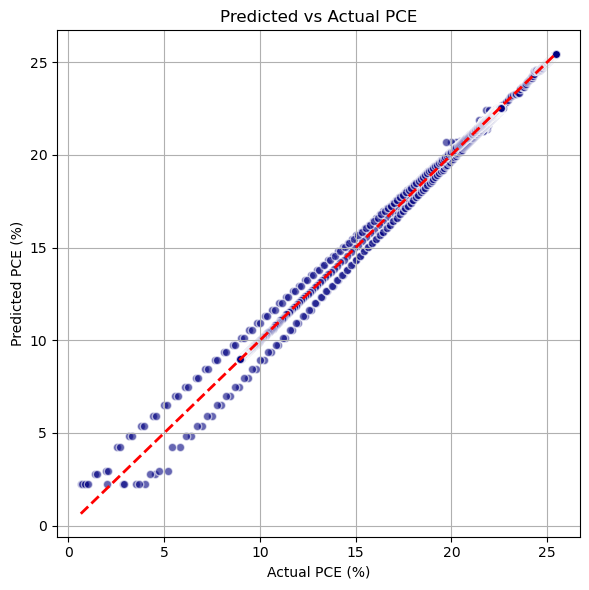

In [14]:
#Graph representation of Predicted vs Actual PCE Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_all, alpha=0.6, color='navy', edgecolor='white')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.title('Predicted vs Actual PCE')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# Fit the model on the entire dataset
best_model.fit(X, y)  # Train the model using all available data

# Predict target values for the entire dataset
y_pred_all = best_model.predict(X)  # Generate predictions for all samples

# View first 10 predicted values only
print(y_pred_all[:10])  # Display a preview of the predictions


[21.85479256 21.85479256 22.44020025 22.44045308 22.24292873 22.19781016
 22.36925303 22.54259203 22.66169508 22.71413689]


In [39]:
#Comparison of actual vs predicted
for actual, predicted in zip(y[:10], y_pred_all[:10]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual: 21.46, Predicted: 21.85
Actual: 21.63, Predicted: 21.85
Actual: 21.80, Predicted: 22.44
Actual: 21.95, Predicted: 22.44
Actual: 22.10, Predicted: 22.24
Actual: 22.24, Predicted: 22.20
Actual: 22.37, Predicted: 22.37
Actual: 22.50, Predicted: 22.54
Actual: 22.62, Predicted: 22.66
Actual: 22.73, Predicted: 22.71


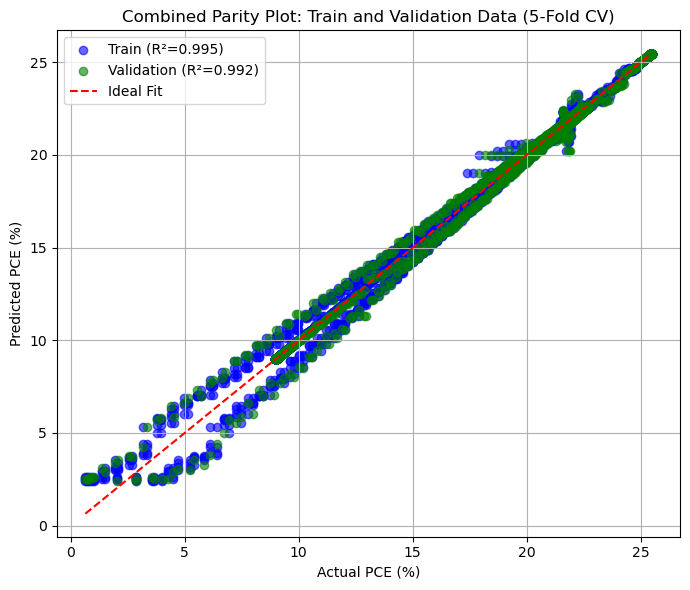

In [40]:
# Import necessary library for visualization
import matplotlib.pyplot as plt

# Initialize lists to store actual vs. predicted values for both train and validation sets
y_train_true_all, y_train_pred_all = [], []
y_val_true_all, y_val_pred_all = [], []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X):
    # Split dataset into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model on training data
    best_model.fit(X_train, y_train)

    # Make predictions on both training and validation data
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)

    # Store actual vs. predicted values for parity plot
    y_train_true_all.extend(y_train)
    y_train_pred_all.extend(y_train_pred)
    y_val_true_all.extend(y_val)
    y_val_pred_all.extend(y_val_pred)

# Convert lists to NumPy arrays for numerical operations
y_train_true_all = np.array(y_train_true_all)
y_train_pred_all = np.array(y_train_pred_all)
y_val_true_all = np.array(y_val_true_all)
y_val_pred_all = np.array(y_val_pred_all)

# Compute R² scores for train and validation sets
r2_train = r2_score(y_train_true_all, y_train_pred_all)  # Goodness-of-fit for training data
r2_val = r2_score(y_val_true_all, y_val_pred_all)  # Goodness-of-fit for validation data

# Create parity plot to visualize actual vs. predicted values
plt.figure(figsize=(7, 6))

# Scatter plot for training data
plt.scatter(y_train_true_all, y_train_pred_all, color='blue', alpha=0.6, label=f'Train (R²={r2_train:.3f})')

# Scatter plot for validation data
plt.scatter(y_val_true_all, y_val_pred_all, color='green', alpha=0.6, label=f'Validation (R²={r2_val:.3f})')

# Plot ideal fit line (y = x) for reference
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', linewidth=1.5, label='Ideal Fit')

# Add labels and title
plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.title('Combined Parity Plot: Train and Validation Data (5-Fold CV)')

# Display legend and grid
plt.legend()
plt.grid(True)

# Optimize layout and display plot
plt.tight_layout()
plt.show()


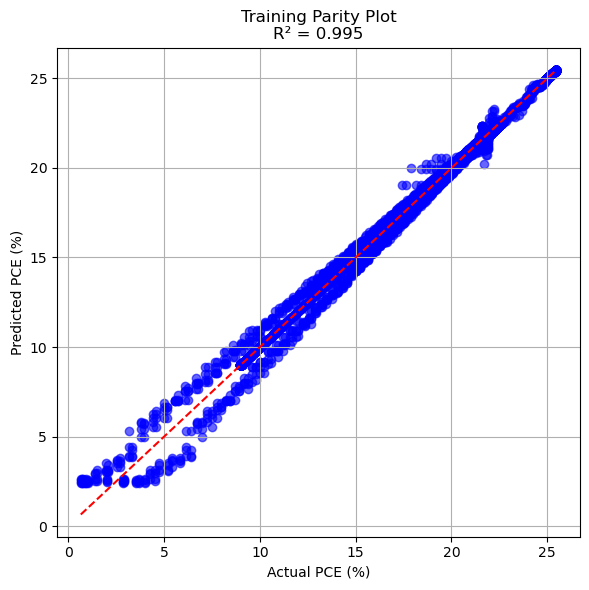

In [41]:
# Parity Plot for Training Data Only

from sklearn.metrics import r2_score

import numpy as np

import matplotlib.pyplot as plt

# Convert to arrays (if not already)
y_train_true_all = np.array(y_train_true_all)
y_train_pred_all = np.array(y_train_pred_all)

r2_train = r2_score(y_train_true_all, y_train_pred_all)

plt.figure(figsize=(6, 6))
plt.scatter(y_train_true_all, y_train_pred_all, color='blue', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', linewidth=1.5)
plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.title(f'Training Parity Plot\nR² = {r2_train:.3f}')
plt.grid(True)
plt.tight_layout()
plt.show()

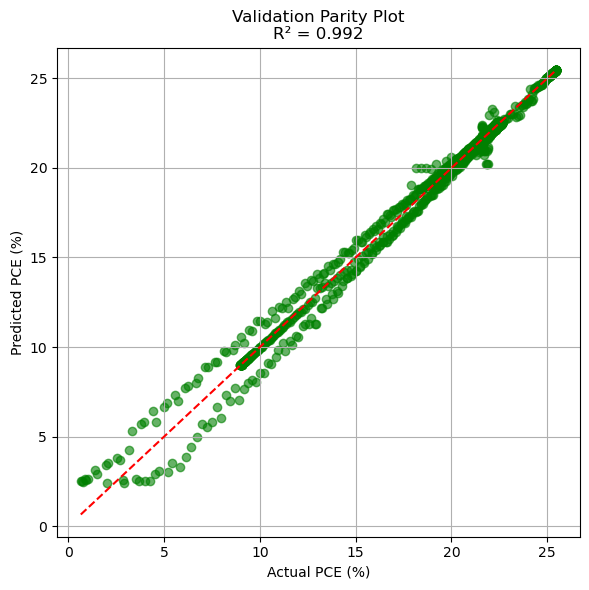

In [42]:
#Parity Plot for Validation Data Only
y_val_true_all = np.array(y_val_true_all)
y_val_pred_all = np.array(y_val_pred_all)

r2_val = r2_score(y_val_true_all, y_val_pred_all)

plt.figure(figsize=(6, 6))
plt.scatter(y_val_true_all, y_val_pred_all, color='green', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', linewidth=1.5)
plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.title(f'Validation Parity Plot\nR² = {r2_val:.3f}')
plt.grid(True)
plt.tight_layout()
plt.show()

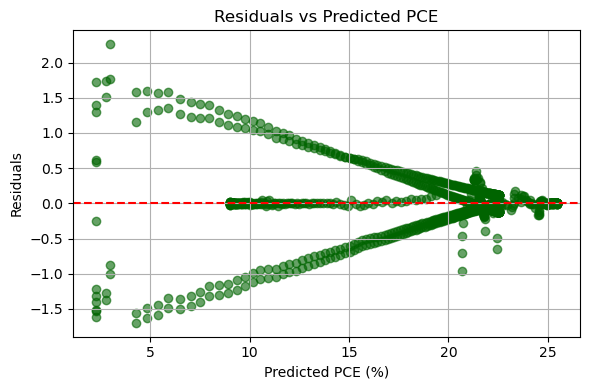

In [43]:
# Visualization for Residual Plot (Error vs Predicted PCE)
%matplotlib inline
import matplotlib.pyplot as plt

# Ensure model is trained
best_model.fit(X, y)
y_pred_all = best_model.predict(X)

# Compute residuals
residuals = y - y_pred_all

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_all, residuals, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Predicted PCE (%)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted PCE')
plt.grid(True)
plt.tight_layout()
plt.show()

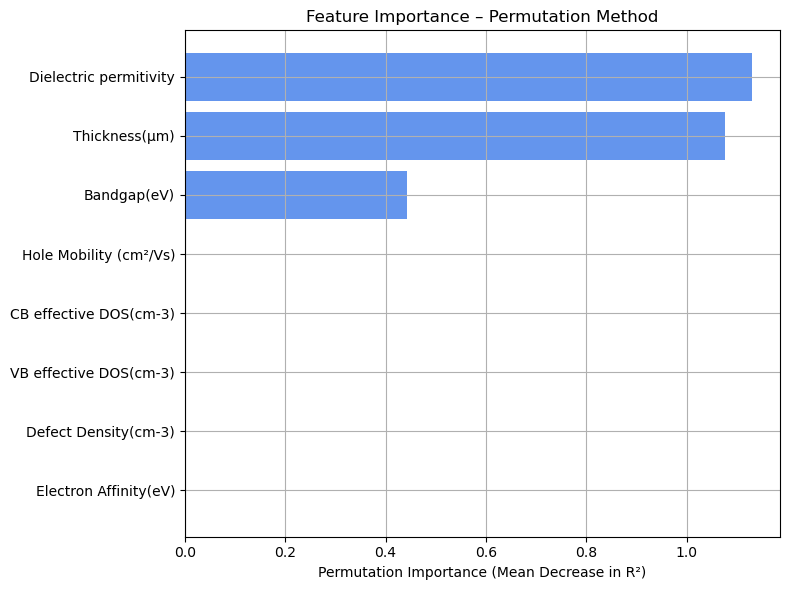

In [44]:
from sklearn.inspection import permutation_importance

#Train model on available data
best_model.fit(X, y)

# Compute permutation importance
result = permutation_importance(best_model, X, y, n_repeats=10, random_state=42, scoring='r2')

# Prepare DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='cornflowerblue')
plt.xlabel('Permutation Importance (Mean Decrease in R²)')
plt.title('Feature Importance – Permutation Method')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
#Install shap 
!pip install shap

In [46]:
#Import shap library
import shap



In [47]:
plt.savefig("shap_bar_plot.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

 99%|===================| 1587/1599 [00:13<00:00]        

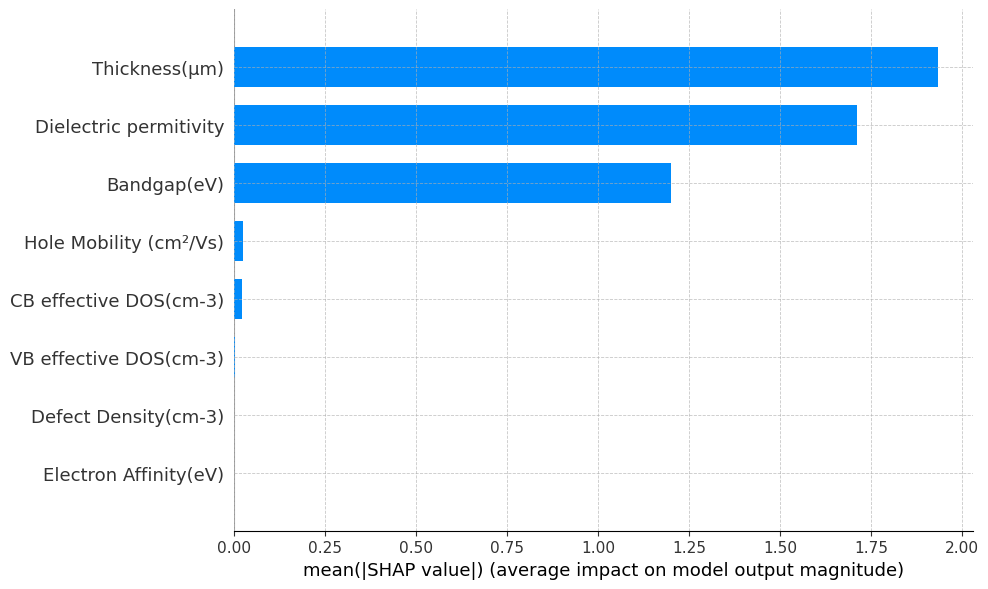

In [48]:
#Import libs for graphs
import matplotlib.pyplot as plt

# Use the already trained model 'best_model' and feature set 'X'
explainer = shap.Explainer(best_model, X)
shap_values = explainer(X)

# Generate SHAP bar plot without displaying immediately
shap.summary_plot(shap_values, X, plot_type="bar", show=False)

# Access the current figure and axis
fig = plt.gcf()
ax = plt.gca()

# Set desired figure size
fig.set_size_inches(10, 6)

# Add gridlines to both axes
ax.grid(True, axis='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Apply tight layout and display
plt.tight_layout()
plt.show()

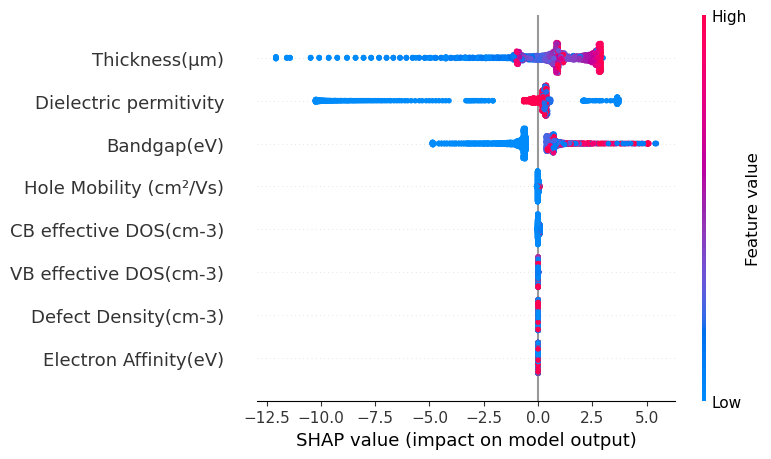

In [26]:
#Display shap values as a plotted summary graph
shap.summary_plot(shap_values, X)

In [27]:
# Calculate mean absolute SHAP values
shap_means = np.abs(shap_values.values).mean(axis=0)

# Calculate relative importance
relative_importance = (shap_means / shap_means.sum()) * 100

# Create a DataFrame
rel_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Relative Importance (%)': relative_importance
}).sort_values(by='Relative Importance (%)', ascending=False)

# Display the all the values as a table
print(rel_imp_df.to_string(index=False))

               Feature  Relative Importance (%)
         Thickness(μm)                39.506622
Dielectric permitivity                34.962988
           Bandgap(eV)                24.538144
Hole Mobility (cm²/Vs)                 0.489769
CB effective DOS(cm-3)                 0.443414
VB effective DOS(cm-3)                 0.059064
 Electron Affinity(eV)                 0.000000
  Defect Density(cm-3)                 0.000000
